## KNN2 1 and 2 occupants

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

seed=2020

In [2]:
# Loading dataframes for 1 and 2 occupants
filePath = ''
df1 = pd.read_csv(filePath + '.csv', index_col=0)
df2 = pd.read_csv(filePath + '.csv', index_col=0)

df = pd.concat([df1, df2])
df = df.reset_index()

# Drop data with missing values
df = df.loc[df.iloc[:, 22:].dropna().index]
print(df.shape)
# Resample dataframe
resample_value = df['Number of Occupants'].value_counts().min()
df = pd.concat([
    df[df['Number of Occupants'] == 1].sample(resample_value,random_state=seed),
    df[df['Number of Occupants'] == 2].sample(resample_value,random_state=seed)
])
df = df.sample(frac=1,random_state=seed).reset_index(drop=True)
print(df.shape)
# Split into X and y
X = df.iloc[:, 22:]
y = df['Number of Occupants']

# Processing
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

(1879, 2038)
(1878, 2038)


In [3]:
# Spliting testing and training set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=seed)

In [5]:
# I vary the parameter 'metric':['euclidean','manhattan','chebyshev','minkowski'], and I get the best value of k for each one(k=different odd numbers )

k_range = [11,13,15,17,19,21,23,25,27,29] #range(1,20)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range,scores)
plt.xticks([11,13,15,17,19,21,23,25,27,29])


"k_range = [11,13,15,17,19,21,23,25,27,29] #range(1,20)\nscores=[]\nfor k in k_range:\n    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')\n    knn.fit(X_train,y_train)\n    scores.append(knn.score(X_test,y_test))\nplt.figure()\nplt.xlabel('k')\nplt.ylabel('Accuracy')\nplt.scatter(k_range,scores)\nplt.xticks([11,13,15,17,19,21,23,25,27,29])"

In [4]:
#I vary the parameters 'metric':['euclidean','manhattan','chebyshev','minkowski'], 'n_neighbors' : [different odd numbers obtained before]
kf = KFold(n_splits=n_splits,shuffle=True, random_state=seed)
parameters = [
    {
         'metric':['euclidean'],
         'n_neighbors' : [43]
    },
    {
         'metric': ['chebyshev'],
         'n_neighbors' : [11,13,15,17,19]
    }
]
clf = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, cv=kf)
clf.fit(X=X, y=y)
clf.best_params_


"parameters = [\n    {\n         'metric':['euclidean'],\n         'n_neighbors' : [43]\n    },\n    {\n         'metric': ['chebyshev'],\n         'n_neighbors' : [11,13,15,17,19]\n    }\n]\nclf = GridSearchCV(KNeighborsClassifier(), param_grid=parameters)\nclf.fit(X=X_train, y=y_train)\nclf.best_params_"

# With cross validation

Accuracy: 0.65 (+/- 0.04)


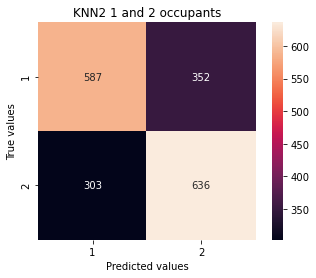

In [10]:
#I use the parameters that I obtained before, to train and test the final model with kfold
n_neighbors=43
n_splits=5
knn = KNeighborsClassifier(n_neighbors, metric='euclidean')
kf = KFold(n_splits=n_splits,shuffle=True, random_state=seed)
scores = cross_val_score(knn, X, y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#---------------------------------------------------------------------
y_pred_cv = cross_val_predict(knn,X,y,cv=kf)
matrix = pd.DataFrame(
    confusion_matrix(y, y_pred_cv), 
    columns=range(1, y.max()+1), 
    index=range(1, y.max()+1)
)
sns.heatmap(matrix, annot=True, fmt='.0f', square=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('KNN2 1 and 2 occupants')
plt.show()